# k Means project

In [1]:
# import libraries    
import numpy as np
import matplotlib.pyplot as plt    
import pandas as pd    
from sklearn.cluster import KMeans  
import seaborn as sns
import squarify


# Load data

In [2]:
df = pd.read_csv('Intel.csv')

In [3]:
df.head()

,date,open,high,low,close,volume
0,1980-03-17,0.1927,0.1958,0.1927,0.1927,10924800
1,1980-03-18,0.1927,0.1943,0.1912,0.1912,17068800
2,1980-03-19,0.1958,0.1989,0.1958,0.1958,18508800
3,1980-03-20,0.1958,0.1981,0.1950,0.1950,11174400
4,1980-03-21,0.1912,0.1912,0.1881,0.1881,12172800


# Data pre-processing Step


### Drop irrelevant features

In [4]:
data = df.drop(columns=['date','volume'])

### Drop duplicate data

In [ ]:
#check duplication
data.duplicated().sum()

362

In [ ]:
# removing duplicates 
data.drop_duplicates(inplace=True)

In [ ]:
# check duplication
data.duplicated().sum()

0

In [ ]:
#statistical description of data
data.describe()

,open,high,low,close
count,10265.000000,10265.000000,10265.000000,10265.000000
mean,15.301306,15.501838,15.102351,15.301417
std,15.317827,15.505949,15.135517,15.320879
min,0.129500,0.129500,0.128000,0.128000
25%,0.911200,0.925100,0.888100,0.911200
50%,13.265800,13.415200,13.078700,13.255700
75%,20.112900,20.409600,19.828500,20.078900
max,65.848100,66.128100,64.332300,65.906100


In [ ]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10265 entries, 0 to 10626
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10265 non-null  float64
 1   high    10265 non-null  float64
 2   low     10265 non-null  float64
 3   close   10265 non-null  float64
dtypes: float64(4)
memory usage: 401.0 KB


In [ ]:
#Check null values
data.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [ ]:
#Check correlation 
data.corr()

,open,high,low,close
open,1.000000,0.999840,0.999846,0.999681
high,0.999840,1.000000,0.999755,0.999827
low,0.999846,0.999755,1.000000,0.999843
close,0.999681,0.999827,0.999843,1.000000


## The features are strong correlated

In [ ]:
data.shape

(10265, 4)

# EDA step

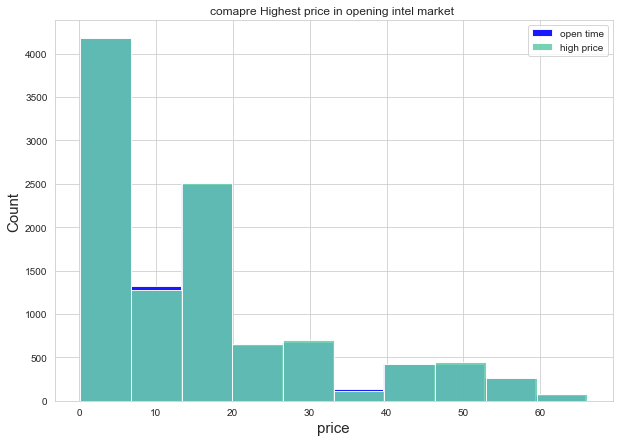

In [ ]:
#compare the  histograms 
plt.figure(figsize=(10,7))
#define the open coloumn from data and define the name of label and the color of the histogram
plt.hist(df["open"], bins=10, alpha=0.9, label="open time",color="blue")
#define the close length coloumn from data and define the name of label and the color of the histogram
plt.hist(df["high"], bins=10, alpha=0.9, label="high price",color="#66CDAA")
#name the label of x
plt.xlabel("price", size=15)
#name the label of y
plt.ylabel("Count", size=15)
#name the title of plot
plt.title("comapre Highest price in opening intel market ")
#to show the petall length over the sepall length
plt.legend(loc='upper right')

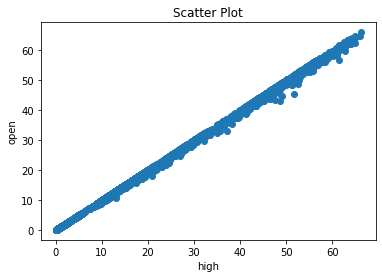

In [ ]:
#Scatter Plot
#scatter plot take the 2 coloums of what it need to visulalize
plt.scatter(df['high'], df['open'])
#named the title of plot
plt.title("Scatter Plot")
#named the title of x label
plt.xlabel("high")
#named the title of y label
plt.ylabel("open")
plt.show()

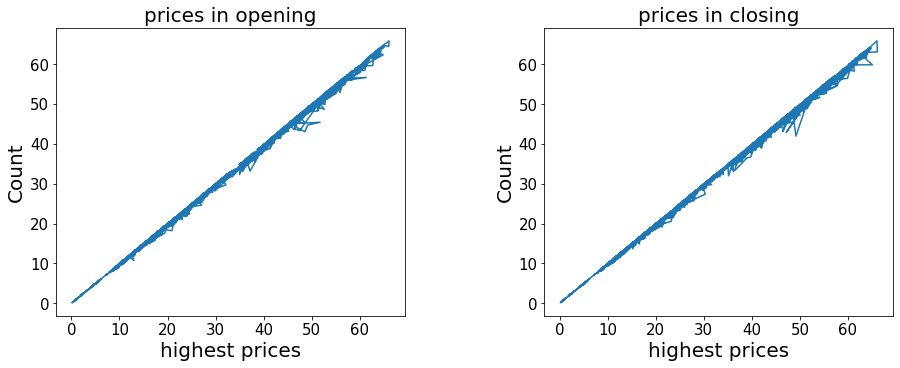

In [ ]:
df_1=df.groupby('high')['open'].sum().to_frame().reset_index()
df_2=df.groupby('high')['close'].sum().to_frame().reset_index()
#we will split it into 2 parts start and end graph
#Set a larger figure size for subplots
plt.figure(figsize=[15,5]);
# 1 rows, 2 col, subplot 1
plt.subplot(1, 2 ,1)
plt.plot(data.high, data.open)
#x axis label
plt.xlabel("highest prices",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("prices in opening",size = 20)   

# 2 row, 1 col, subplot 2
plt.subplot(1, 2, 2) 
plt.plot(data.high, data.close)
plt.xlabel("highest prices",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("prices in closing",size = 20);
plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

#  Finding the optimal number of clusters using the elbow method


we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.

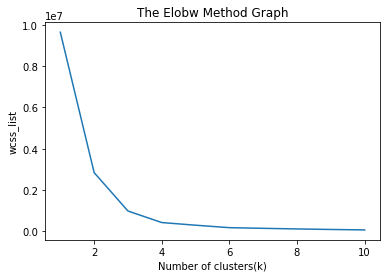

In [ ]:
#finding optimal number of clusters using the elbow method  
#Initializing the list for the values of WCSS  
wcss_list= []   
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5



# Training the K-means algorithm on the training dataset


In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(data)  

In [ ]:
y_predict

array([1, 1, 1, ..., 2, 2, 2])

# Step-4: Visualizing the Clusters


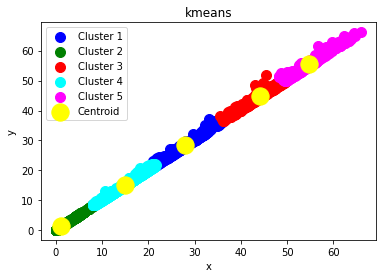

In [ ]:
#visulaizing the clusters  
plt.scatter(data.values[y_predict == 0, 0], data.values[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster 

plt.scatter(data.values[y_predict == 1, 0], data.values[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

plt.scatter(data.values[y_predict== 2, 0], data.values[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  

plt.scatter(data.values[y_predict == 3, 0], data.values[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  

plt.scatter(data.values[y_predict == 4, 0], data.values[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   

plt.title('kmeans')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()  

In [ ]:
#get the labels of clustring
labels=kmeans.labels_
data['clusters']=labels

In [ ]:
data.head()

,open,high,low,close,clusters
0,0.1927,0.1958,0.1927,0.1927,1
1,0.1927,0.1943,0.1912,0.1912,1
2,0.1958,0.1989,0.1958,0.1958,1
3,0.1958,0.1981,0.1950,0.1950,1
4,0.1912,0.1912,0.1881,0.1881,1


In [ ]:
#group the columns of data by its clusters
data.groupby('clusters').mean()

,open,high,low,close
clusters,,,,
0,28.026560,28.354007,27.711190,28.038928
1,1.251501,1.271063,1.232123,1.252232
2,44.170968,44.788104,43.591336,44.177051
3,14.974503,15.180353,14.761336,14.968548
4,54.832905,55.472951,54.198815,54.841963


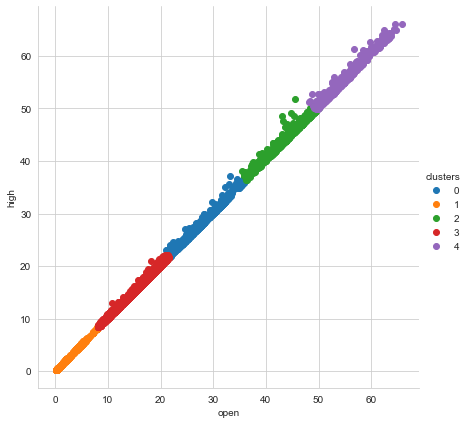

In [ ]:
#use whitegrid plot from seaborn library
sns.set_style("whitegrid")
#define the attribute which plot depends on it (clusters) 
#dfine the kinf of the points in the plot (scatter )
#then define the coloumns 
sns.FacetGrid(data, hue ="clusters",height = 6).map(plt.scatter,'open','high').add_legend()

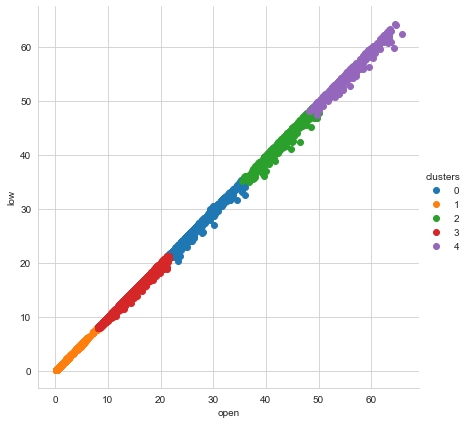

In [ ]:
#use whitegrid plot from seaborn library
sns.set_style("whitegrid")
#define the attribute which plot depends on it (clusters) 
#dfine the kinf of the points in the plot (scatter )
#then define the coloumns 
sns.FacetGrid(data, hue ="clusters",height = 6).map(plt.scatter,'open','low').add_legend()

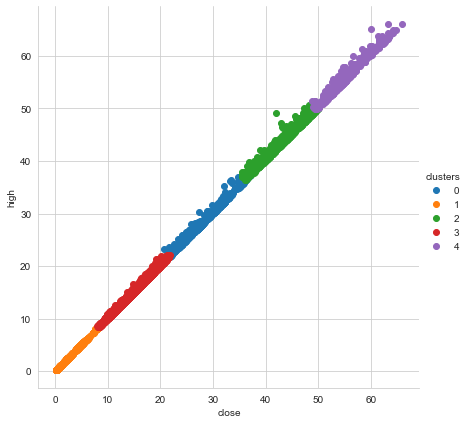

In [ ]:
#use whitegrid plot from seaborn library
sns.set_style("whitegrid")
#define the attribute which plot depends on it (clusters) 
#dfine the kinf of the points in the plot (scatter )
#then define the coloumns 
sns.FacetGrid(data, hue ="clusters",height = 6).map(plt.scatter,'close','high').add_legend()

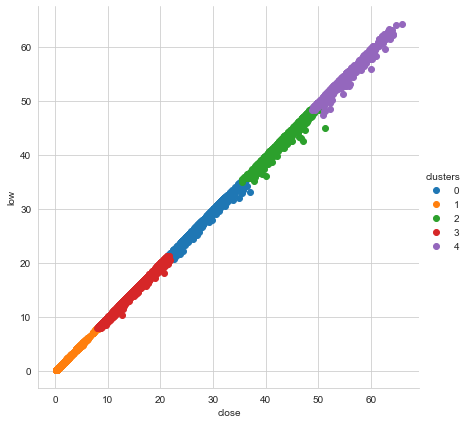

In [ ]:
#use whitegrid plot from seaborn library
sns.set_style("whitegrid")
#define the attribute which plot depends on it (clusters) 
#dfine the kinf of the points in the plot (scatter )
#then define the coloumns 
sns.FacetGrid(data, hue ="clusters",height = 6).map(plt.scatter,'close','low').add_legend()

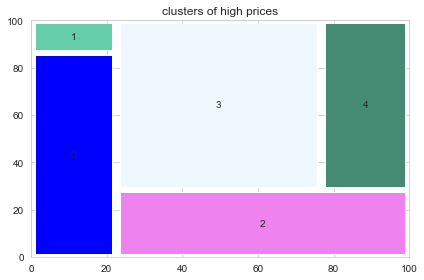

In [ ]:
Tree_fare = data.groupby('clusters')['high'].sum().to_frame().reset_index()
Tree_fare
squarify.plot(sizes=Tree_fare['high'],
              label=Tree_fare['clusters'],
              color=['blue','#66CDAA','violet',"#F0F8FF","#458B74"],
              pad=True);

plt.title('clusters of high prices')
plt.tight_layout()

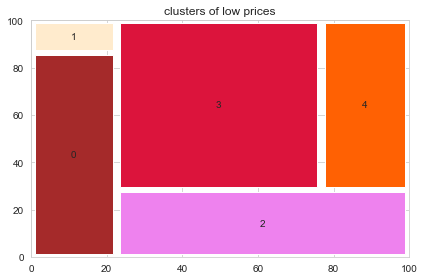

In [ ]:
Tree_fare = data.groupby('clusters')['low'].sum().to_frame().reset_index()
Tree_fare
squarify.plot(sizes=Tree_fare['low'],
              label=Tree_fare['clusters'],
              color=['#A52A2A','#FFEBCD','violet',"#DC143C","#FF6103"],
              pad=True);

plt.title('clusters of low prices')
plt.tight_layout()